In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
churn = pd.read_csv("churn_data.csv")
customer = pd.read_csv("customer_data.csv")
internet = pd.read_csv("internet_data.csv")

In [289]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [290]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [291]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [292]:
df = pd.merge(churn, customer, how='inner', on='customerID')

In [293]:
df = pd.merge(df, internet, how='inner', on='customerID')

In [294]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


#we see that there are 20 columns and we have to clean the dataset now,


In [296]:
#looking for null values
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

# There is no null values

In [297]:
df.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [298]:
#fixing the datatypes and dropping unwanted columns
df.drop(['customerID'], axis=1, inplace=True)

In [299]:
cols = df.columns

In [300]:
#Identifying binary cols
for i in cols:
    print(i, df[i].value_counts().count())


tenure 73
PhoneService 2
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3


In [301]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [302]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   Contract                               7043 non-null   object 
 3   PaperlessBilling                       7043 non-null   int64  
 4   PaymentMethod                          7043 non-null   object 
 5   MonthlyCharges                         7043 non-null   float64
 6   TotalCharges                           7043 non-null   object 
 7   Churn                                  7043 non-null   int64  
 8   gender                                 7043 non-null   object 
 9   SeniorCitizen                          7043 non-null   int64  
 10  Partner                                7043 non-null   int64  
 11  Depe

In [306]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

ValueError: could not convert string to float: ''

In [307]:
df = df[~(df['TotalCharges'] == ' ')]

In [308]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

<ipython-input-308-1716c29819c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float64')


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   PhoneService                           7032 non-null   int64  
 2   Contract                               7032 non-null   object 
 3   PaperlessBilling                       7032 non-null   int64  
 4   PaymentMethod                          7032 non-null   object 
 5   MonthlyCharges                         7032 non-null   float64
 6   TotalCharges                           7032 non-null   float64
 7   Churn                                  7032 non-null   int64  
 8   gender                                 7032 non-null   object 
 9   SeniorCitizen                          7032 non-null   int64  
 10  Partner                                7032 non-null   int64  
 11  Depe

In [310]:
telecom = df

In [311]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [312]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [313]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [314]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


In [315]:
# now machine learning..................!!!!

from sklearn.model_selection import train_test_split

In [316]:
#finding churn rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

In [317]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   PhoneService                           7032 non-null   int64  
 2   PaperlessBilling                       7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   SeniorCitizen                          7032 non-null   int64  
 7   Partner                                7032 non-null   int64  
 8   Dependents                             7032 non-null   int64  
 9   Contract_One year                      7032 non-null   uint8  
 10  Contract_Two year                      7032 non-null   uint8  
 11  Paym

In [318]:

df = telecom
y = telecom.pop('Churn')
X = telecom

X.head()


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [320]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

<ipython-input-320-6a94b9213aed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
/home/umashankar/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
5767,1.325456,1,1,-0.161316,0.679395,0,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
5361,-1.152524,1,1,-1.469930,-0.967341,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5745,1.162966,1,1,-1.343719,-0.365667,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6065,1.081721,1,0,-1.317148,-0.336787,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
229,0.594249,1,1,0.685630,0.811653,0,1,1,0,1,...,0,1,1,0,0,1,0,1,0,1


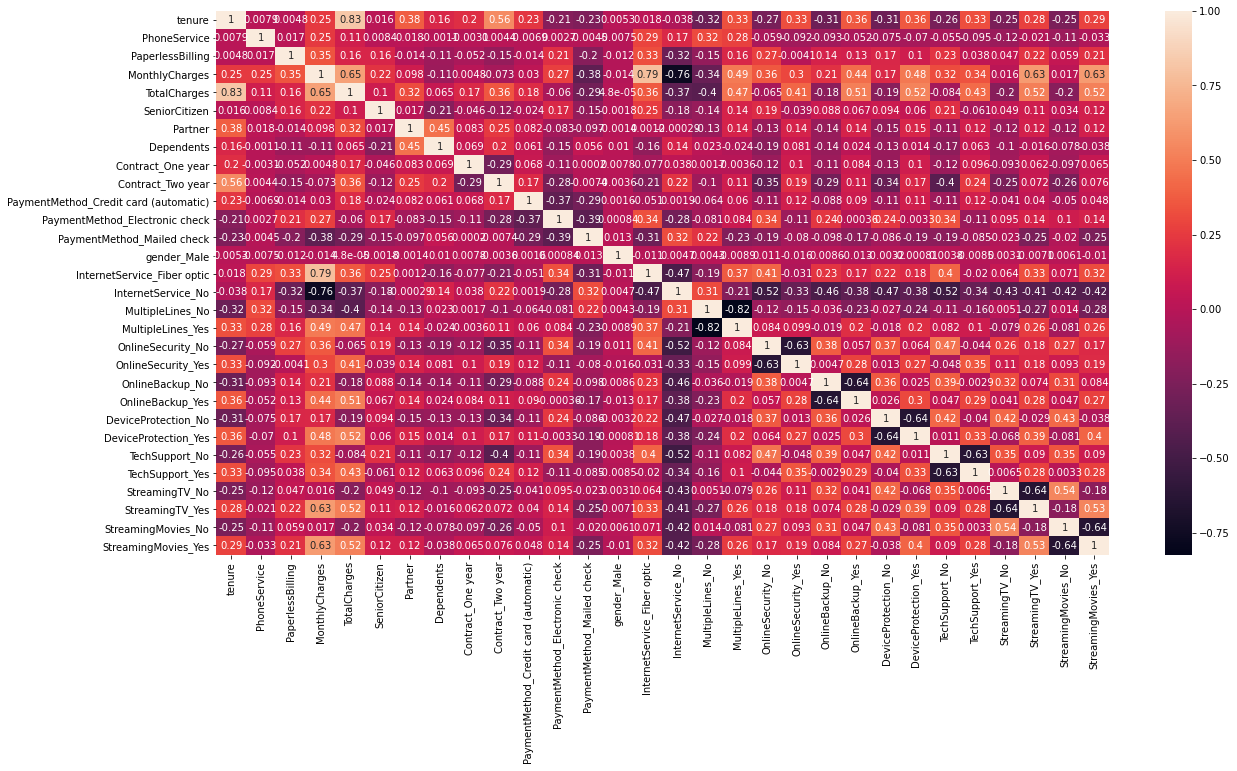

In [321]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [322]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

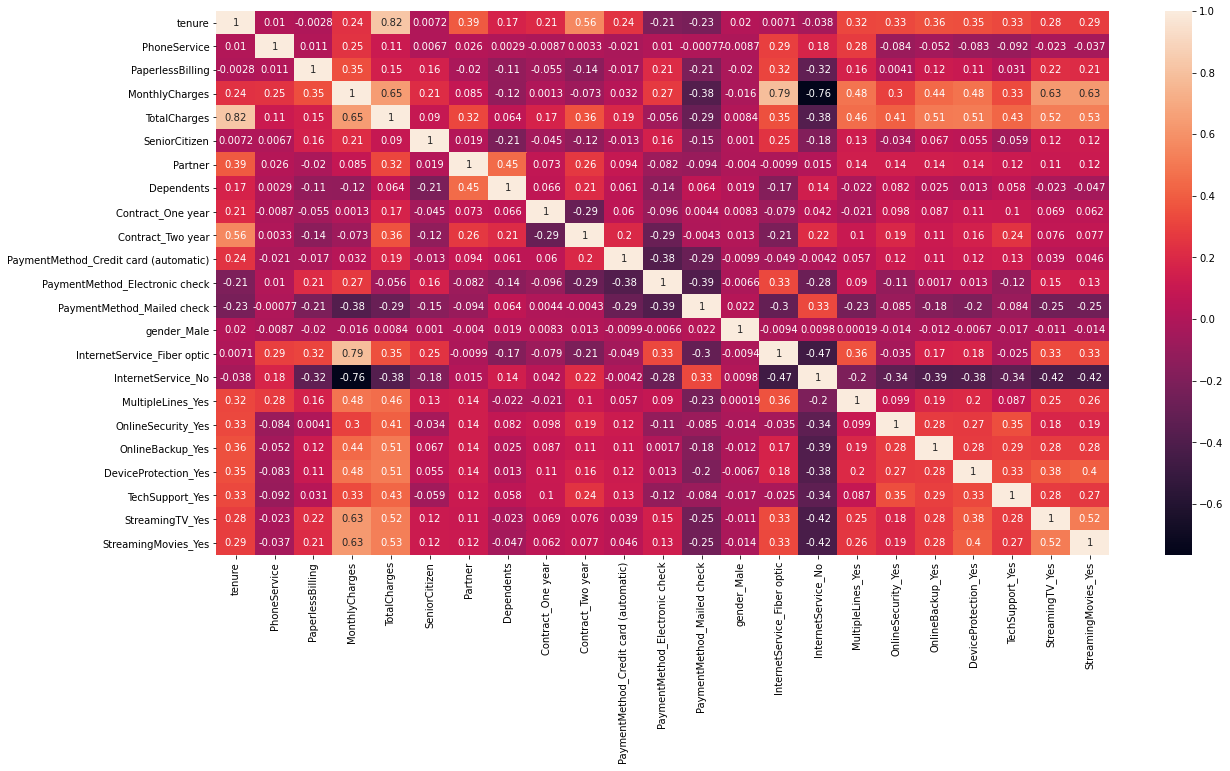

In [323]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [324]:
import statsmodels.api as sm

In [325]:
y_train
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
5767,1.325456,1,1,-0.161316,0.679395,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
5361,-1.152524,1,1,-1.469930,-0.967341,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
5745,1.162966,1,1,-1.343719,-0.365667,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,0
6065,1.081721,1,0,-1.317148,-0.336787,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
229,0.594249,1,1,0.685630,0.811653,0,1,1,0,1,...,0,0,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,-1.193146,1,0,-0.473523,-0.944122,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5199,0.756740,1,1,1.555826,1.517501,0,0,0,1,0,...,0,1,0,1,0,1,1,1,1,1
5235,-0.949410,1,1,0.547794,-0.657891,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
5399,0.716117,1,0,-1.491519,-0.567404,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [326]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4711 entries, 5767 to 862
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4711 non-null   float64
 1   PhoneService                           4711 non-null   int64  
 2   PaperlessBilling                       4711 non-null   int64  
 3   MonthlyCharges                         4711 non-null   float64
 4   TotalCharges                           4711 non-null   float64
 5   SeniorCitizen                          4711 non-null   int64  
 6   Partner                                4711 non-null   int64  
 7   Dependents                             4711 non-null   int64  
 8   Contract_One year                      4711 non-null   uint8  
 9   Contract_Two year                      4711 non-null   uint8  
 10  PaymentMethod_Credit card (automatic)  4711 non-null   uint8  
 11  Pa

In [327]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4711
Model:                            GLM   Df Residuals:                     4687
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1945.1
Date:                Sun, 14 Nov 2021   Deviance:                       3890.1
Time:                        15:19:55   Pearson chi2:                 5.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.5125      1.568     -2.240      0.025      -6.586      -0.439
tenure                                   -1.5170      0.191     -7.960      0.000      -1.891      -1.143
PhoneService                              0.6922      0.801      0.865      0.387      -0.877       2.261
PaperlessBilling                          0.2257      0.091      2.490      0.013       0.048       0.403
MonthlyCharges                           -1.8752      1.182     -1.586      0.113      -4.192       0.442
TotalCharges                              0.7752      0.198      3.921      0.000       0.388       1.163
SeniorCitizen                             0.1939      0.103      1.879      0.060      -0.008       0.396
Partner                                   0.1198      0.096      1.254      0.210      -0.067       0.307
Dependents                               -0.2506      0.111     -2.250      0.024      -0.469      -0.032
Contract_One year                        -0.8364      0.135     -6.179      0.000      -1.102      -0.571
Contract_Two year                        -1.4326      0.213     -6.713      0.000      -1.851      -1.014
PaymentMethod_Credit card (automatic)    -0.1624      0.140     -1.159      0.247      -0.437       0.112
PaymentMethod_Electronic check            0.2242      0.116      1.936      0.053      -0.003       0.451
PaymentMethod_Mailed check               -0.0679      0.141     -0.480      0.631      -0.345       0.209
gender_Male                              -0.0171      0.079     -0.216      0.829      -0.173       0.138
InternetService_Fiber optic               2.3289      0.987      2.361      0.018       0.395       4.263
InternetService_No                       -2.3150      0.997     -2.322      0.020      -4.269      -0.361
MultipleLines_Yes                         0.5263      0.219      2.400      0.016       0.097       0.956
OnlineSecurity_Yes                       -0.1204      0.220     -0.548      0.584      -0.551       0.311
OnlineBackup_Yes                          0.2057      0.216      0.951      0.342      -0.218       0.630
DeviceProtection_Yes                      0.2683      0.216      1.241      0.215      -0.156       0.692
TechSupport_Yes                          -0.0390      0.223     -0.175      0.861      -0.475       0.397
StreamingTV_Yes                           0.8288      0.402      2.064      0.039       0.042       1.616
StreamingMovies_Yes                       0.8380      0.405      2.070      0.038       0.045       1.631
=========================================================================================================
"""

In [329]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [330]:
from sklearn.feature_selection import RFE

In [331]:
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

/home/umashankar/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [332]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', False, 2),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 5),
 ('Dependents', False, 3),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 7),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 6),
 ('DeviceProtection_Yes', False, 8),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [333]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [334]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
5767,1.325456,1,1,-0.161316,0.679395,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
5361,-1.152524,1,1,-1.469930,-0.967341,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
5745,1.162966,1,1,-1.343719,-0.365667,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,0
6065,1.081721,1,0,-1.317148,-0.336787,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
229,0.594249,1,1,0.685630,0.811653,0,1,1,0,1,...,0,0,0,1,1,1,0,1,1,1


In [335]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4711
Model:                            GLM   Df Residuals:                     4695
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.5
Date:                Sun, 14 Nov 2021   Deviance:                       3905.0
Time:                        15:24:50   Pearson chi2:                 5.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8177      0.491     -3.705      0.000      -2.779      -0.856
tenure                            -1.5076      0.187     -8.062      0.000      -1.874      -1.141
PhoneService                      -0.1610      0.296     -0.543      0.587      -0.742       0.420
MonthlyCharges                    -0.6345      0.392     -1.619      0.105      -1.403       0.133
TotalCharges                       0.7892      0.196      4.029      0.000       0.405       1.173
SeniorCitizen                      0.2519      0.101      2.496      0.013       0.054       0.450
Contract_One year                 -0.8637      0.134     -6.423      0.000      -1.127      -0.600
Contract_Two year                 -1.4765      0.212     -6.967      0.000      -1.892      -1.061
PaymentMethod_Electronic check     0.3170      0.084      3.762      0.000       0.152       0.482
InternetService_Fiber optic        1.3418      0.341      3.930      0.000       0.673       2.011
InternetService_No                -1.3333      0.387     -3.449      0.001      -2.091      -0.576
MultipleLines_Yes                  0.3366      0.116      2.894      0.004       0.109       0.565
OnlineSecurity_Yes                -0.3328      0.121     -2.753      0.006      -0.570      -0.096
TechSupport_Yes                   -0.2418      0.127     -1.912      0.056      -0.490       0.006
StreamingTV_Yes                    0.4364      0.164      2.668      0.008       0.116       0.757
StreamingMovies_Yes                0.4445      0.165      2.697      0.007       0.121       0.768
==================================================================================================
"""

In [336]:
y_train_pred = res.predict(X_train_sm)
y_train_pred

5767    0.009754
5361    0.093743
5745    0.003537
6065    0.004019
229     0.029238
          ...   
3778    0.428519
5199    0.242644
5235    0.561795
5399    0.008522
862     0.554276
Length: 4711, dtype: float64

In [337]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.009754,5767
1,0,0.093743,5361
2,0,0.003537,5745
3,0,0.004019,6065
4,0,0.029238,229


In [338]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.009754,5767,0
1,0,0.093743,5361,0
2,0,0.003537,5745,0
3,0,0.004019,6065,0
4,0,0.029238,229,0


In [339]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3069  383]
 [ 550  709]]


In [340]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8019528762470813


In [341]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [342]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,13.10
3,TotalCharges,10.16
1,PhoneService,8.21
0,tenure,6.91
8,InternetService_Fiber optic,6.37
9,InternetService_No,6.12
6,Contract_Two year,3.43
13,StreamingTV_Yes,2.78
14,StreamingMovies_Yes,2.74
10,MultipleLines_Yes,2.54


In [343]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [344]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4711
Model:                            GLM   Df Residuals:                     4696
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.6
Date:                Sun, 14 Nov 2021   Deviance:                       3905.3
Time:                        15:30:19   Pearson chi2:                 5.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.0600      0.204    -10.094      0.000      -2.460      -1.660
tenure                            -1.5048      0.187     -8.046      0.000      -1.871      -1.138
MonthlyCharges                    -0.8127      0.214     -3.797      0.000      -1.232      -0.393
TotalCharges                       0.7966      0.195      4.076      0.000       0.413       1.180
SeniorCitizen                      0.2537      0.101      2.516      0.012       0.056       0.451
Contract_One year                 -0.8591      0.134     -6.401      0.000      -1.122      -0.596
Contract_Two year                 -1.4716      0.212     -6.949      0.000      -1.887      -1.057
PaymentMethod_Electronic check     0.3176      0.084      3.770      0.000       0.153       0.483
InternetService_Fiber optic        1.4751      0.238      6.211      0.000       1.010       1.941
InternetService_No                -1.5075      0.215     -7.002      0.000      -1.929      -1.086
MultipleLines_Yes                  0.3616      0.107      3.385      0.001       0.152       0.571
OnlineSecurity_Yes                -0.3056      0.110     -2.778      0.005      -0.521      -0.090
TechSupport_Yes                   -0.2111      0.113     -1.866      0.062      -0.433       0.011
StreamingTV_Yes                    0.4979      0.118      4.214      0.000       0.266       0.729
StreamingMovies_Yes                0.5075      0.117      4.330      0.000       0.278       0.737
==================================================================================================
"""

In [345]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.010282,5767,0
1,0,0.093793,5361,0
2,0,0.003587,5745,0
3,0,0.004058,6065,0
4,0,0.029708,229,0


In [346]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8015283379324984


In [347]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,MonthlyCharges,13.07
2,TotalCharges,10.09
0,tenure,6.82
8,InternetService_No,5.37
7,InternetService_Fiber optic,5.13
5,Contract_Two year,3.30
12,StreamingTV_Yes,2.75
13,StreamingMovies_Yes,2.72
9,MultipleLines_Yes,2.27
4,Contract_One year,1.94
